In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.0001)
model.add_layer(DenseLayer(1, 8, True, weight_constraint=[-3, 3], afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(2, 4, True, weight_constraint=[-3, 3], afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(3, 3, True, weight_constraint=[-3, 3], afn=softmax, dafn=d_sigmoid, rfn=None))

In [4]:
# optimizer
opt = 'sgd'

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = opt, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 15000
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

6
itr 14622
Iteration 14622/15000: 	0.8093725186642086
itr 14623
Iteration 14623/15000: 	0.8093720908476928
itr 14624
Iteration 14624/15000: 	0.8093717343339296
itr 14625
Iteration 14625/15000: 	0.8093713065174138
itr 14626
Iteration 14626/15000: 	0.809371092609156
itr 14627
Iteration 14627/15000: 	0.8093706647926402
itr 14628
Iteration 14628/15000: 	0.809370308278877
itr 14629
Iteration 14629/15000: 	0.809369951765114
itr 14630
Iteration 14630/15000: 	0.8093695952513508
itr 14631
Iteration 14631/15000: 	0.8093692387375876
itr 14632
Iteration 14632/15000: 	0.8093688109210718
itr 14633
Iteration 14633/15000: 	0.8093685257100613
itr 14634
Iteration 14634/15000: 	0.8093680978935456
itr 14635
Iteration 14635/15000: 	0.8093677413797824
itr 14636
Iteration 14636/15000: 	0.8093673848660192
itr 14637
Iteration 14637/15000: 	0.8093670996550087
itr 14638
Iteration 14638/15000: 	0.8093667431412456
itr 14639
Iteration 14639/15000: 	0.8093663153247298
itr 14640
Iteration 14640/15000: 	0.80936588750

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

9744450935, 0.8095996179313303, 0.8095991901148145, 0.8095989762065566, 0.8095984770872883, 0.8095981918762778, 0.809597764059762, 0.8095974075459988, 0.8095971223349884, 0.8095966232157199, 0.8095962667019567, 0.8095959814909462, 0.8095956249771831, 0.80959526846342, 0.8095949119496568, 0.8095945554358936, 0.8095940563166253, 0.8095938424083674, 0.8095934145918516, 0.8095930580780885, 0.8095927015643254, 0.8095923450505622, 0.809591988536799, 0.809591632023036, 0.8095912755092728, 0.809590847692757, 0.8095905624817465, 0.8095901346652308, 0.8095897781514676, 0.8095894216377044, 0.809589136426694, 0.8095887086101782, 0.8095884233991676, 0.8095879955826518, 0.8095876390688888, 0.8095872825551256, 0.8095869260413624, 0.8095864982248466, 0.8095862130138362, 0.809585856500073, 0.8095854286835572, 0.8095851434725467, 0.809584715656031, 0.8095843591422678, 0.8095840026285047, 0.8095836461147415, 0.8095833609037311, 0.8095829330872153, 0.8095825765734521, 0.8095821487569363, 0.809581863545925

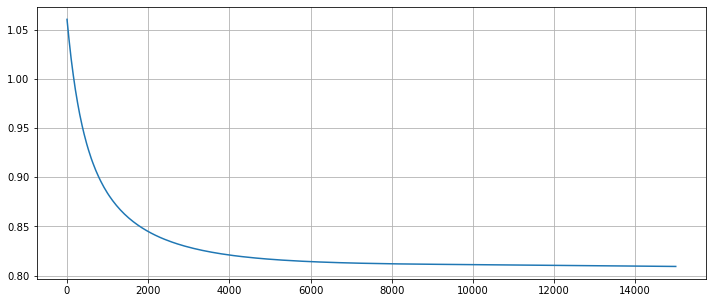

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 0. 1.] <-> [[0.7662537 ]
 [0.1896675 ]
 [0.04407879]]
[1. 0. 0.] <-> [[0.6693824 ]
 [0.26278156]
 [0.06783608]]
[1. 0. 0.] <-> [[0.793369  ]
 [0.16833985]
 [0.03829109]]
[1. 0. 0.] <-> [[0.66679806]
 [0.26478463]
 [0.0684173 ]]
[1. 0. 0.] <-> [[0.7364597 ]
 [0.21079606]
 [0.05274425]]
[1. 0. 0.] <-> [[0.7776588 ]
 [0.17951873]
 [0.0428225 ]]
[1. 0. 0.] <-> [[0.7737661 ]
 [0.1824284 ]
 [0.04380545]]
[1. 0. 0.] <-> [[0.7934085 ]
 [0.16830863]
 [0.03828283]]
[1. 0. 0.] <-> [[0.72481126]
 [0.2197889 ]
 [0.05539992]]
[1. 0. 0.] <-> [[0.79319257]
 [0.16798148]
 [0.03882602]]
[1. 0. 0.] <-> [[0.7562788 ]
 [0.19562094]
 [0.04810031]]
[1. 0. 0.] <-> [[0.79135096]
 [0.16993304]
 [0.03871602]]
[1. 0. 0.] <-> [[0.48922107]
 [0.38734412]
 [0.12343482]]
[0. 1. 0.] <-> [[0.52117854]
 [0.37136832]
 [0.10745313]]
[0. 1. 0.] <-> [[0.6544976 ]
 [0.27430993]
 [0.07119247]]
[0. 1. 0.] <-> [[0.46088427]
 [0.39737222]
 [0.14174353]]
[1. 0. 0.] <-> [[0.7329979 ]
 [0.21346453]
 [0.05353765]]
[1. 0. 0.] <->

In [13]:
print(model)

Neuron 0: weights:
[[-2.8107107 ]
 [-1.4283758 ]
 [-0.8140126 ]
 [ 0.94219565]
 [ 0.83892965]]
 bias: [-1.97992688]

Neuron 1: weights:
[[-0.8647999 ]
 [ 2.2085075 ]
 [ 2.8202074 ]
 [-1.3448055 ]
 [ 0.07265525]]
 bias: [0.07853881]

Neuron 2: weights:
[[-1.1546582 ]
 [ 0.98420465]
 [ 2.4007    ]
 [-2.3034384 ]
 [-1.9607046 ]]
 bias: [-0.52686656]

Neuron 3: weights:
[[-0.02011774]
 [ 0.33834642]
 [-0.22230753]
 [ 1.9147246 ]
 [-0.01641113]]
 bias: [2.51219269]

Neuron 4: weights:
[[-2.2426445 ]
 [ 0.2112805 ]
 [-2.695037  ]
 [ 0.35999605]
 [ 1.5288036 ]]
 bias: [2.21181399]

Neuron 5: weights:
[[-0.59249824]
 [-2.6117342 ]
 [ 0.7424279 ]
 [ 1.2685275 ]
 [-2.0902205 ]]
 bias: [2.09102397]

Neuron 6: weights:
[[-0.6044487 ]
 [ 0.00243148]
 [ 1.8079292 ]
 [ 0.99868584]
 [-2.349803  ]]
 bias: [-1.31842942]

Neuron 7: weights:
[[ 2.2685232 ]
 [ 1.936167  ]
 [-1.9301338 ]
 [-0.11606564]
 [-0.597641  ]]
 bias: [2.7131204]

$
Neuron 0: weights:
[[ 0.02082845]
 [-1.9521013 ]
 [ 0.09357636]
 [-2